# 기계 고장 진단
- 공구 마모 여부와 고장 원인을 파악하는 것이 목표

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

## 데이터 확인

In [2]:
df = pd.read_csv('./predictive_maintenance.csv')
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [4]:
df['Product ID'].nunique()

10000

##### 컬럼 설명
- UDI: 인덱스
- Product ID: 제품 고유번호, 고유번호 앞에 붙은 L, M, H는 제품의 퀄리티를 나타냄. L(모든 제품의 50%), M(30%) 및 H(20%) 
- Type : 제품 타입
- air temp[K]: 공기 온도
- process temp [K] : 공정 온도
- rotation speed [rpm] : 회전 속도
- Torque [Nm] : 토크가 걸리는 정도
- tool wear [min] : 공구 마모 시간
- Target : Failure or Not
- Failure Type : Type of Failure

In [5]:
df.sample(10)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
1993,1994,M16853,M,298.3,308.0,1463,42.5,190,0,No Failure
1109,1110,L48289,L,296.6,307.5,1557,35.1,60,0,No Failure
3574,3575,L50754,L,301.7,310.6,1406,46.0,112,0,No Failure
2898,2899,M17758,M,300.6,309.5,1550,40.2,96,0,No Failure
7787,7788,L54967,L,300.3,311.5,1378,47.5,64,0,No Failure
1219,1220,M16079,M,296.9,308.1,1357,41.8,127,0,No Failure
5869,5870,L53049,L,301.5,311.1,2076,18.7,103,0,No Failure
8613,8614,M23473,M,297.5,308.5,1401,50.5,6,0,No Failure
6895,6896,M21755,M,301.0,311.6,1357,45.6,137,0,No Failure
8362,8363,L55542,L,298.6,309.6,1353,62.5,9,0,No Failure


In [6]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [7]:
df.drop(columns = ['UDI'], inplace = True)

In [8]:
df.rename(lambda x: x.lower().strip().replace(' ', '_'), axis='columns', inplace=True)

In [9]:
df.columns = [col.replace('[', '').replace(']', '').replace('<', '') for col in df.columns]

In [10]:
df.head()

,product_id,type,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min,target,failure_type
0,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


## 데이터 전처리

In [11]:
df['target'].value_counts()

0    9661
1     339
Name: target, dtype: int64

In [12]:
df.failure_type.value_counts()

No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: failure_type, dtype: int64

In [13]:
df.type.value_counts()

L    6000
M    2997
H    1003
Name: type, dtype: int64

- Target: 0 (정상) 9661개
- No Failure: 9652개
- **잘못 표기된 데이터 있음**

In [14]:
no_failure_index = df.loc[(df.target == 0) & (df.failure_type == 'No Failure')]
len(no_failure_index)

9643

In [15]:
drop_index = df.loc[(df.target == 0) & (df.failure_type != 'No Failure')]
len(drop_index) # failure_type = random failures

18

In [16]:
len(no_failure_index) + len(drop_index)

9661

- Random Failure는 정상 상태로 분류되어 있음
- **Target: 0 (정상) 데이터 = Random Failures & No Failure**

In [17]:
target_0_index = df.loc[(df.failure_type == 'Random Failures') | (df.failure_type == 'No Failure')]
len(target_0_index)

9670

- target: 0 (정상) 데이터 = Random Failures & No Failure = 9670
- 실제 target: 0 (정상) 데이터 (9661)와 차이 존재
- **No Failure 데이터의 타겟이 잘못 표기되었을 가능성?**

In [18]:
drop_index = df.loc[(df.target == 1) & (df.failure_type == 'No Failure')]
len(drop_index)

9

In [19]:
drop_index

,product_id,type,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min,target,failure_type
1437,H30851,H,298.8,309.9,1439,45.2,40,1,No Failure
2749,M17609,M,299.7,309.2,1685,28.9,179,1,No Failure
4044,M18904,M,301.9,310.9,1419,47.7,20,1,No Failure
4684,M19544,M,303.6,311.8,1421,44.8,101,1,No Failure
5536,M20396,M,302.3,311.8,1363,54.0,119,1,No Failure
5941,L53121,L,300.6,310.7,1438,48.5,78,1,No Failure
6478,L53658,L,300.5,309.8,1663,29.1,145,1,No Failure
8506,L55686,L,298.4,309.6,1710,27.3,163,1,No Failure
9015,L56195,L,297.2,308.1,1431,49.7,210,1,No Failure


In [20]:
df2 = df.drop(index = drop_index.index)
df2 = df2.reset_index(drop = True)

In [21]:
df2.target.value_counts()

0    9661
1     330
Name: target, dtype: int64

In [22]:
df2.failure_type.value_counts()

No Failure                  9643
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: failure_type, dtype: int64

In [23]:
target_0 = df2.loc[(df2.failure_type == 'No Failure') | (df2.failure_type == 'Random Failures')]
len(target_0)

9661

In [24]:
target_1 = df2.loc[(df2.failure_type != 'No Failure') & (df2.failure_type != 'Random Failures')]
len(target_1)

330

## 레이블 인코딩

In [25]:
df2['type'] = df2['type'].map({'M': 1, 'L': 2, 'H': 3})
df2.head()

,product_id,type,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min,target,failure_type
0,M14860,1,298.1,308.6,1551,42.8,0,0,No Failure
1,L47181,2,298.2,308.7,1408,46.3,3,0,No Failure
2,L47182,2,298.1,308.5,1498,49.4,5,0,No Failure
3,L47183,2,298.2,308.6,1433,39.5,7,0,No Failure
4,L47184,2,298.2,308.7,1408,40.0,9,0,No Failure


- type 컬럼은 제품 퀄리티를 나타내는 컬럼. 컬럼 값 레이블 인코딩 진행

In [26]:
mapping = {'No Failure': 0, 'Heat Dissipation Failure': 1, 'Power Failure': 2,
           'Overstrain Failure': 3, 'Tool Wear Failure': 4, 'Random Failures': 5}

df2['failure_type'] = df2['failure_type'].map(mapping)
df2.head()

,product_id,type,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min,target,failure_type
0,M14860,1,298.1,308.6,1551,42.8,0,0,0
1,L47181,2,298.2,308.7,1408,46.3,3,0,0
2,L47182,2,298.1,308.5,1498,49.4,5,0,0
3,L47183,2,298.2,308.6,1433,39.5,7,0,0
4,L47184,2,298.2,308.7,1408,40.0,9,0,0


- failure type 컬럼은 고장 원인을 나타내는 컬럼. 컬럼 값 레이블 인코딩

In [27]:
df2.drop(columns = ['product_id'], inplace = True)
# 필요없어보이니까 삭제

## 시각화

<AxesSubplot: >

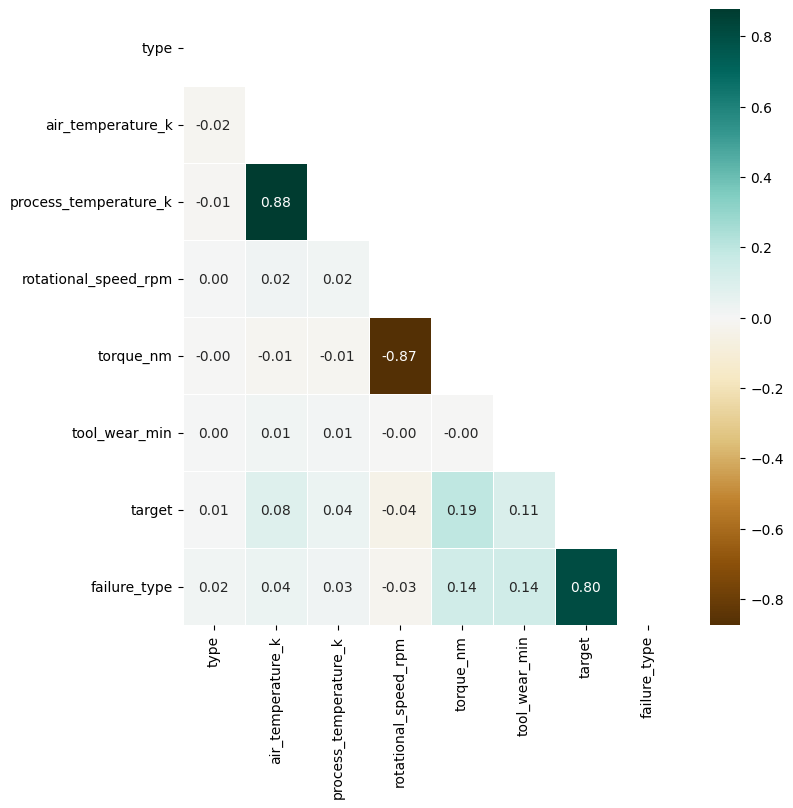

In [28]:
corr = df2.corr()
plt.figure(figsize = (8,8))
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr, fmt = ".2f", mask = mask, annot = True, cmap = 'BrBG', linewidths = .5)
           # vmax = .3, center = 0, square = True, cbar_kws = {"shrink" : .5})

- 강한 음의 상관관계: rotational speed(회전 속도) & torque
- 강한 양의 상관관계: air temperature & process temperature
- failure type (고장 타입)의 경우 상관성이 있는 변수가 없음

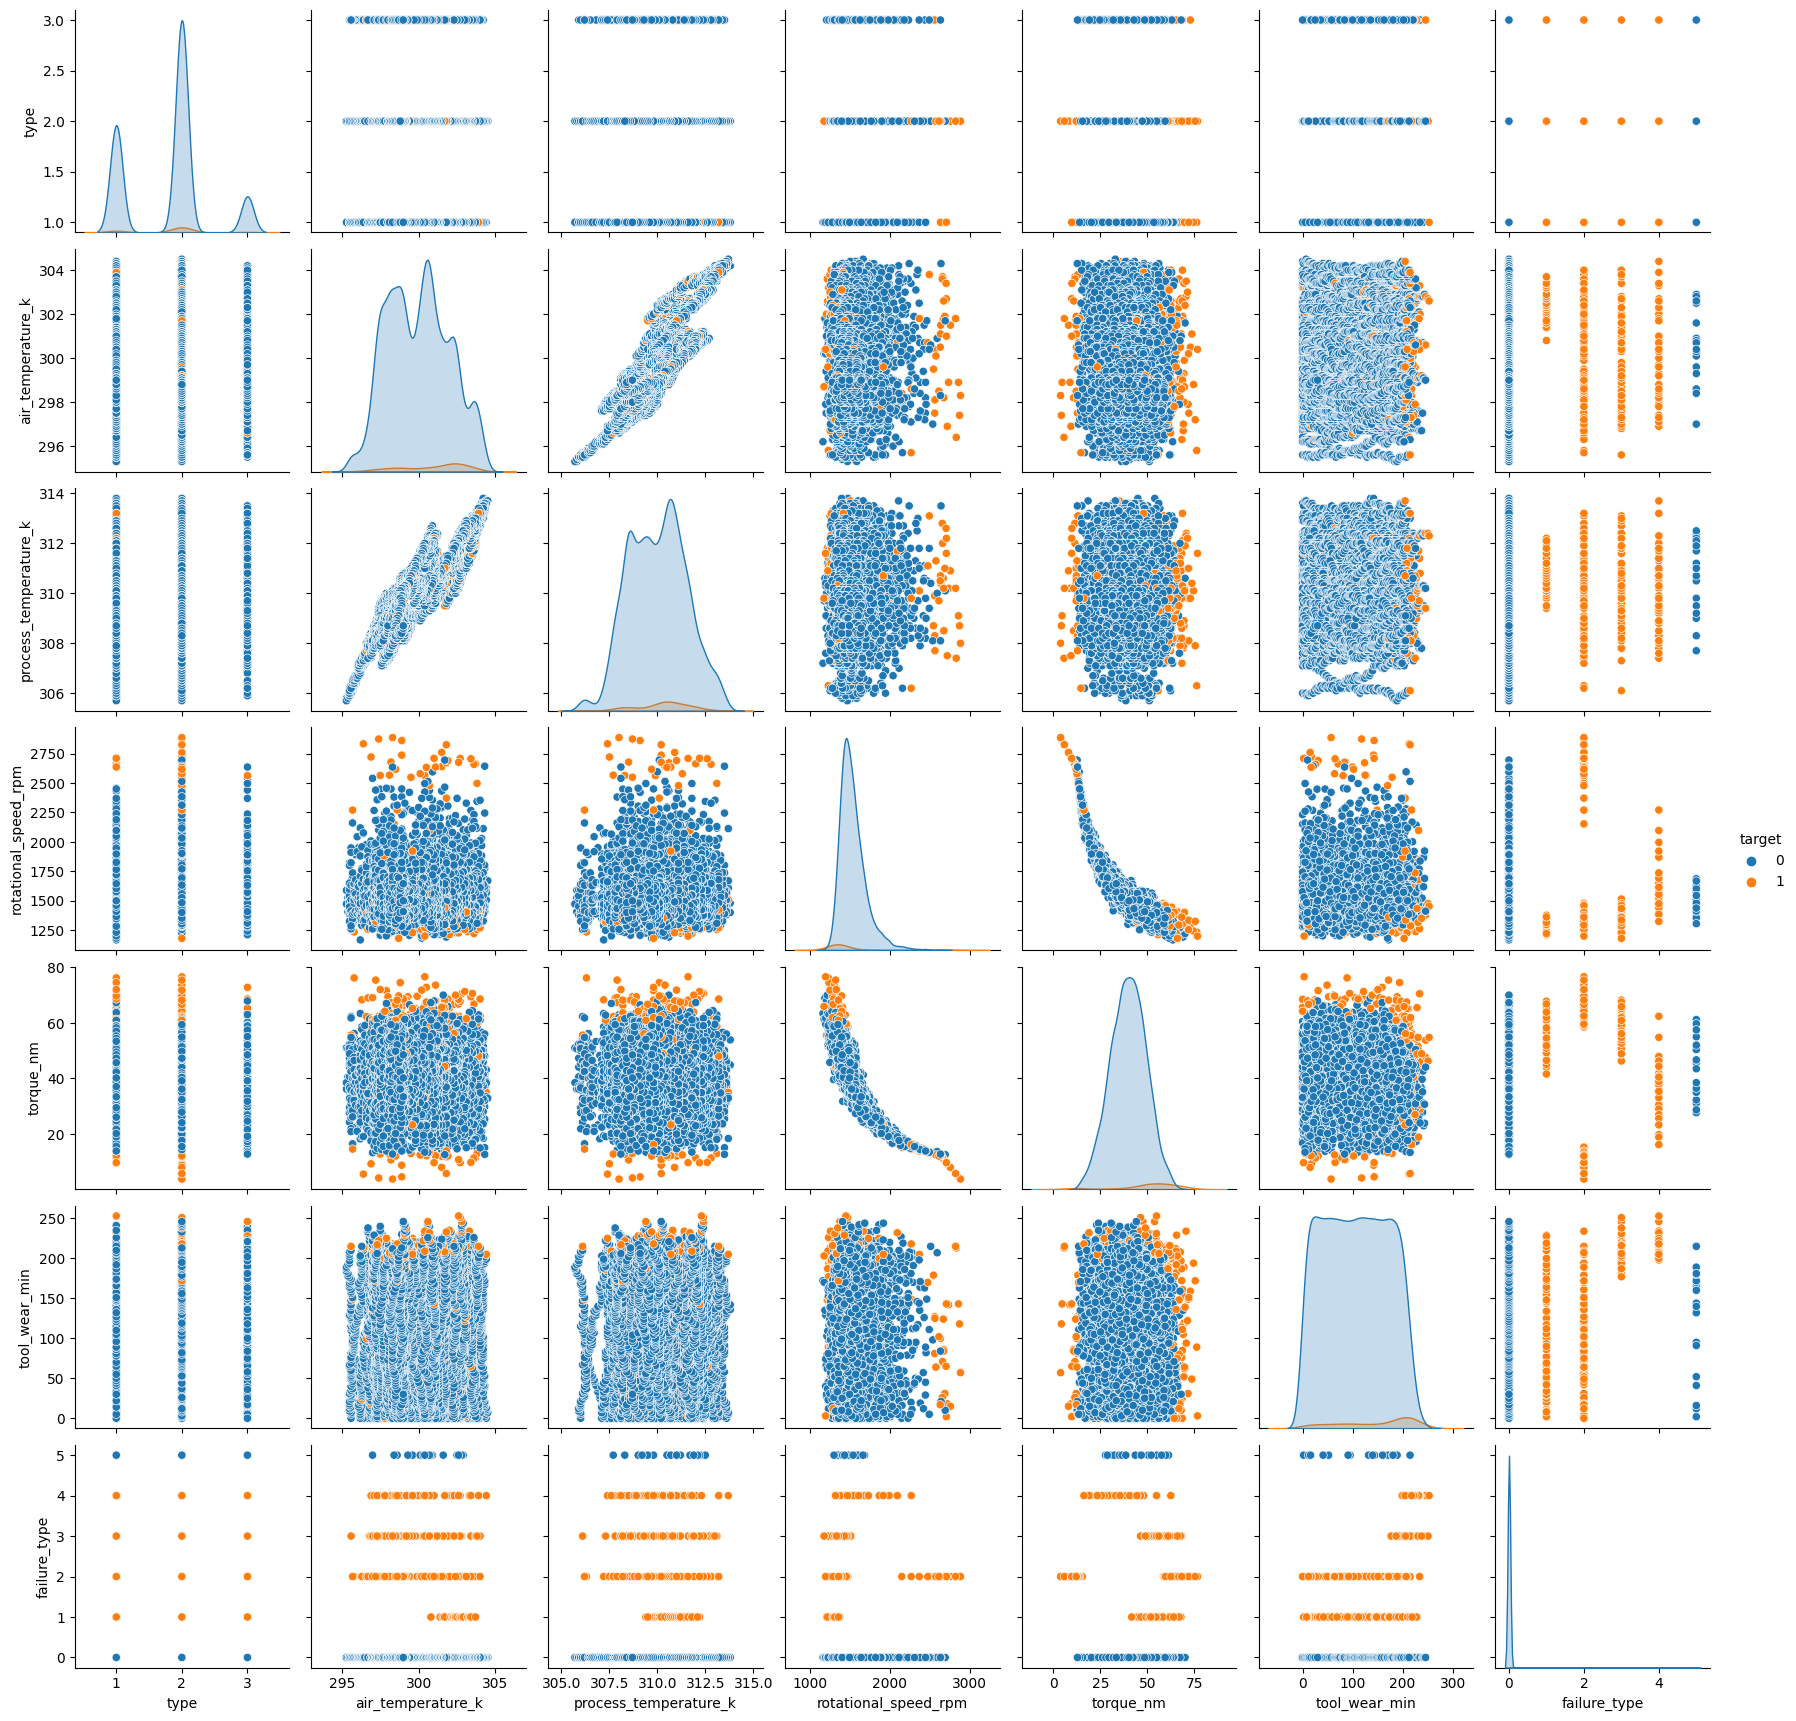

In [29]:
sns.pairplot(df2, hue = "target")

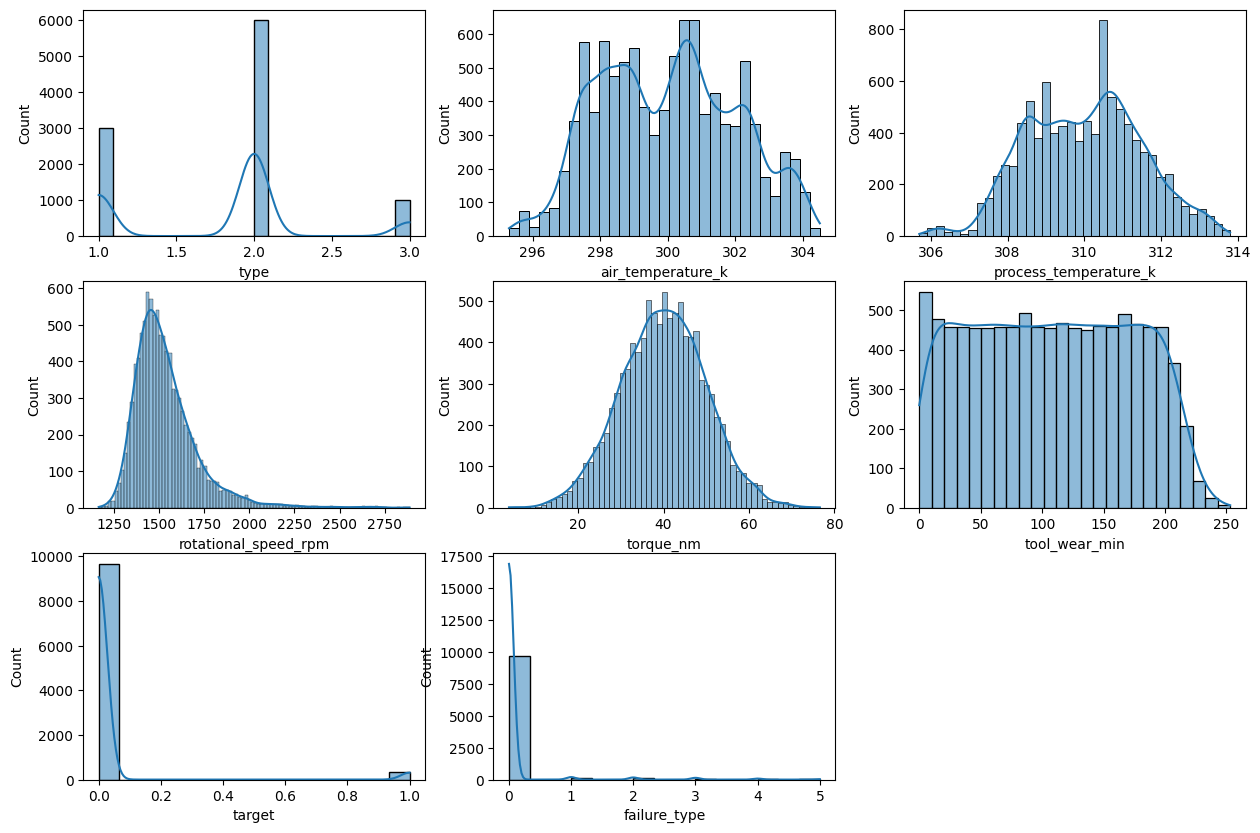

In [30]:
plt.figure(figsize=(15,10))
for i,col in enumerate(df2.columns, 1):
    plt.subplot(3,3,i)
    sns.histplot(df2[col],kde=True)

- tool wear를 제외하고 대부분의 수치 변수들이 어느 정도 정규 분포를 보임

## 모델분석

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, classification_report

### 모델 1. 고장 여부 판단 (RF)

In [32]:
X = df2.drop(columns = ['target', 'failure_type'])
y = df2['target']

In [33]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train,y_train)

y_pred_random = rf.predict(X_valid)
score_random = rf.score(X_valid, y_valid) 
print('score: ',score_random)

report=classification_report(y_true=y_valid, y_pred= y_pred_random)
print('\n',report)

score:  0.984992496248124

               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1924
           1       0.94      0.64      0.76        75

    accuracy                           0.98      1999
   macro avg       0.96      0.82      0.88      1999
weighted avg       0.98      0.98      0.98      1999



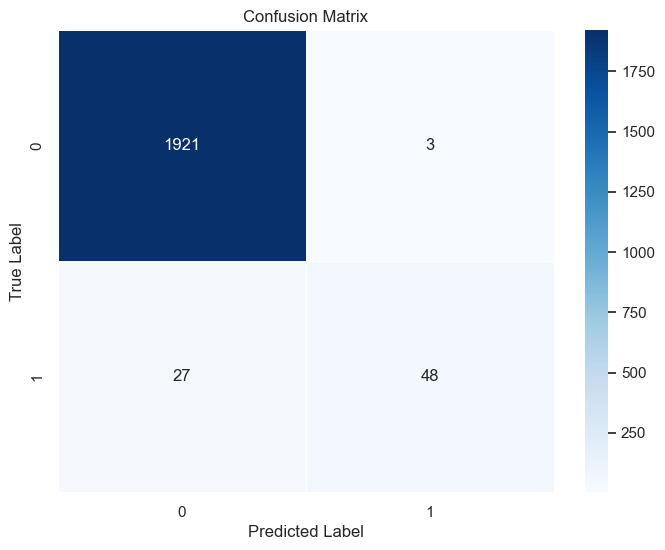

In [35]:
cm = confusion_matrix(y_valid, y_pred_random)

plt.figure(figsize=(8, 6))
sns.set(font_scale = 1.0)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths = .5)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

- 정확도가 높은 것 같지만 클래스 불균형이 있는 데이터셋이었음. (0의 수가 압도적으로 많고, 1이 적었음)
- 이 문제에서 중요한 것은 고장 상태를 고장 상태로 예측하는 것 : recall 점수가 높아야 모델의 예측 성능이 좋다고 할 수 있음
- 해당 문제에서 1을 1이라고 맞추는 경우의 recall 값이 0.61로 낮은 상태
- **클래스 불균형을 해결 필요**

### 모델 2. 고장 여부 및 고장 원인 판단 (RF)

In [36]:
X2 = df2.drop(columns = ['target', 'failure_type'])
y2 = df2['failure_type']

In [37]:
X_train, X_valid, y_train, y_valid = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [38]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

y_pred_random = rf.predict(X_valid)
score_random = rf.score(X_valid, y_valid) 
print('score: ',score_random)

report = classification_report(y_true = y_valid, y_pred = y_pred_random)
print('\n',report)

score:  0.9799899949974987

               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1920
           1       1.00      0.64      0.78        25
           2       0.80      0.84      0.82        19
           3       1.00      0.45      0.62        20
           4       0.00      0.00      0.00        11
           5       0.00      0.00      0.00         4

    accuracy                           0.98      1999
   macro avg       0.63      0.49      0.54      1999
weighted avg       0.97      0.98      0.98      1999



/Users/minkim/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/minkim/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/minkim/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


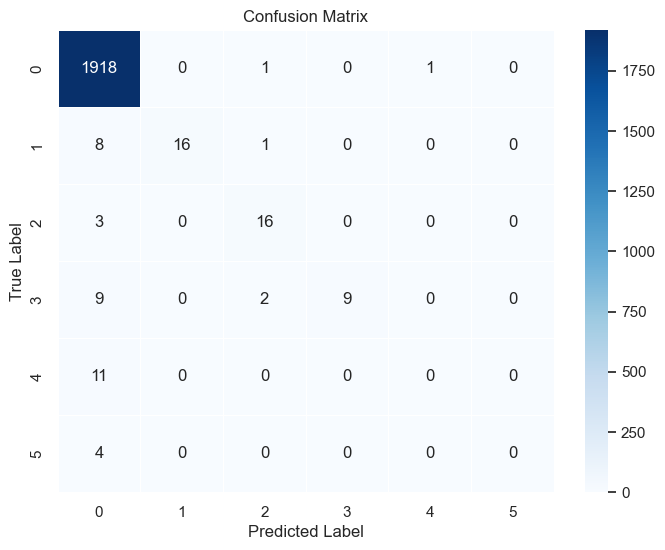

In [39]:
cm2 = confusion_matrix(y_valid, y_pred_random)

plt.figure(figsize=(8, 6))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', linewidths = .5)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [40]:
df['failure_type'].value_counts()

No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: failure_type, dtype: int64

- 4 & 5 (Tool wear failure & Random Failures)의 경우 모두 0 (No Failure) 상태로 잘못 예측
- 3 (Overstrain Failure)의 경우 절반 이상 0 (No Failure) 또는 2 (Power Failure)로 잘못 예측했으나 대체로 고장 상태를 잘 맞추는 경향
- 1 & 2 (Heat Dissipation Failure & Power Failure)의 경우 대체로 잘 맞추는 경향
- **각 고장 타입에 대한 특성이 부족하거나, 데이터가 부족한 것이 원인일 수 있음**

#### 추가적으로 할 수 있는 것?
1. 데이터 양을 늘려서 모델 정확도 올리기 (smote 증강 기법 사용)
2. 파인튜닝
3. 고장 원인 파악 - 고장 세분화
4. 정상 데이터 버리고 고장 데이터끼리 분석


### 모델 1. RF로 고장 여부 판단 with Over sampling (SMOTE)
- 학습 데이터 증강 (KNN 거리 기반으로 고장 데이터와 분포가 유사한 데이터 생성)

In [41]:
from imblearn.over_sampling import SMOTE

In [42]:
X2 = df2.drop(columns = ['target', 'failure_type'])
y2 = df2['target']

In [43]:
smote = SMOTE(random_state = 42)
X_resampled, y_resampled = smote.fit_resample(X2, y2)

In [44]:
print(X_resampled.shape)
print(y_resampled.value_counts())

(19322, 6)
0    9661
1    9661
Name: target, dtype: int64


In [45]:
X_train, X_valid, y_train, y_valid = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [46]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

y_pred_random = rf.predict(X_valid)
score_random = rf.score(X_valid, y_valid) 
print('score: ',score_random)

report=classification_report(y_true=y_valid,y_pred= y_pred_random)
print('\n',report)

score:  0.9787839586028461

               precision    recall  f1-score   support

           0       0.99      0.96      0.98      1940
           1       0.97      0.99      0.98      1925

    accuracy                           0.98      3865
   macro avg       0.98      0.98      0.98      3865
weighted avg       0.98      0.98      0.98      3865



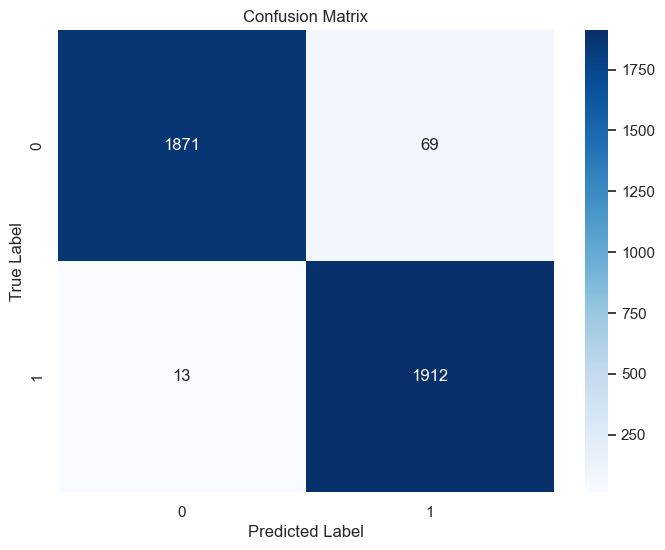

In [47]:
cm = confusion_matrix(y_valid, y_pred_random)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

- precision과 recall 값이 급격하게 올라간 모습 확인 가능

### 모델 2. RF로 고장 여부 판단 및 고장 원인 분류 테스트 with Over sampling (SMOTE)

In [48]:
X2 = df2.drop(columns = ['target', 'failure_type'])
y2 = df2['failure_type']

In [49]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X2, y2)

In [50]:
print(X_resampled.shape)
print(y_resampled.value_counts())

(57858, 6)
0    9643
2    9643
4    9643
3    9643
5    9643
1    9643
Name: failure_type, dtype: int64


In [51]:
X_train, X_valid, y_train, y_valid = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [52]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

y_pred_random = rf.predict(X_valid)
score_random = rf.score(X_valid, y_valid) 
print('score: ',score_random)

report = classification_report(y_true = y_valid, y_pred = y_pred_random)
print('\n',report)

score:  0.9924818527480125

               precision    recall  f1-score   support

           0       1.00      0.96      0.98      1962
           1       1.00      1.00      1.00      1884
           2       1.00      1.00      1.00      1845
           3       0.99      1.00      1.00      1965
           4       0.98      1.00      0.99      1921
           5       0.99      1.00      0.99      1995

    accuracy                           0.99     11572
   macro avg       0.99      0.99      0.99     11572
weighted avg       0.99      0.99      0.99     11572



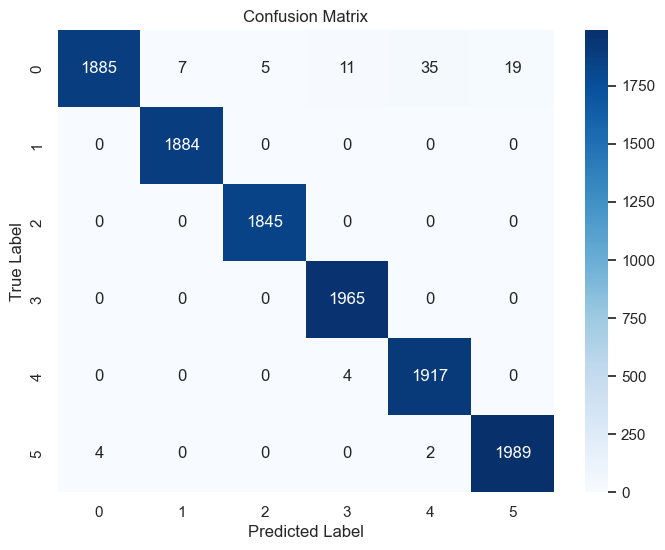

In [53]:
cm = confusion_matrix(y_valid, y_pred_random)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

- 고장 여부를 판단하면서, 고장 원인을 파악하는 분류 분석에서도 정확도가 눈에 띄게 상승한 것 확인

- 모델 생성 이후 새로운 데이터로 모델 테스트를 해봐야 함. 왜냐하면 정상끼리는 분포가 비슷한데, 고장끼리는 분포가 다를 수 있어서 다른 데이터셋에서도 모델 성능이 좋은지 확인하는 과정이 필요함

### 모델1. XGBoost 사용해서 고장 여부 판단

In [64]:
X3 = df2.drop(columns = ['target', 'failure_type'])
y3 = df2['target']

In [65]:
smote = SMOTE(random_state=42)
X_resampled2, y_resampled2 = smote.fit_resample(X3, y3)

In [66]:
print(X_resampled2.shape)
print(y_resampled2.value_counts())

(19322, 6)
0    9661
1    9661
Name: target, dtype: int64


In [67]:
X_train, X_valid, y_train, y_valid = train_test_split(X_resampled2, y_resampled2, test_size=0.2, random_state=42)

In [68]:
import xgboost as xgb

xgboost_model = xgb.XGBClassifier()
xgboost_model.fit(X_train, y_train)

y_pred_xgboost = xgboost_model.predict(X_valid)
score_xgboost = xgboost_model.score(X_valid, y_valid)
print('score: ', score_xgboost)

report = classification_report(y_true=y_valid, y_pred=y_pred_xgboost)
print('\n', report)

score:  0.9857697283311773

               precision    recall  f1-score   support

           0       0.99      0.98      0.99      1940
           1       0.98      0.99      0.99      1925

    accuracy                           0.99      3865
   macro avg       0.99      0.99      0.99      3865
weighted avg       0.99      0.99      0.99      3865



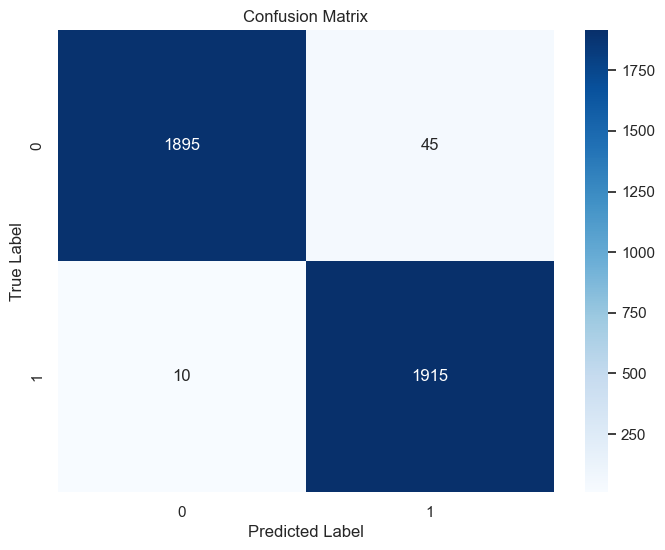

In [69]:
cm = confusion_matrix(y_valid, y_pred_xgboost)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

- 시간과 모델 정확도 측면에서 RF보다 살짝 증가함. 일단 사용해보고 비교하는 것이 중요하지만 이건 개인 실습이니까..

### 모델1. XGB: feature importance

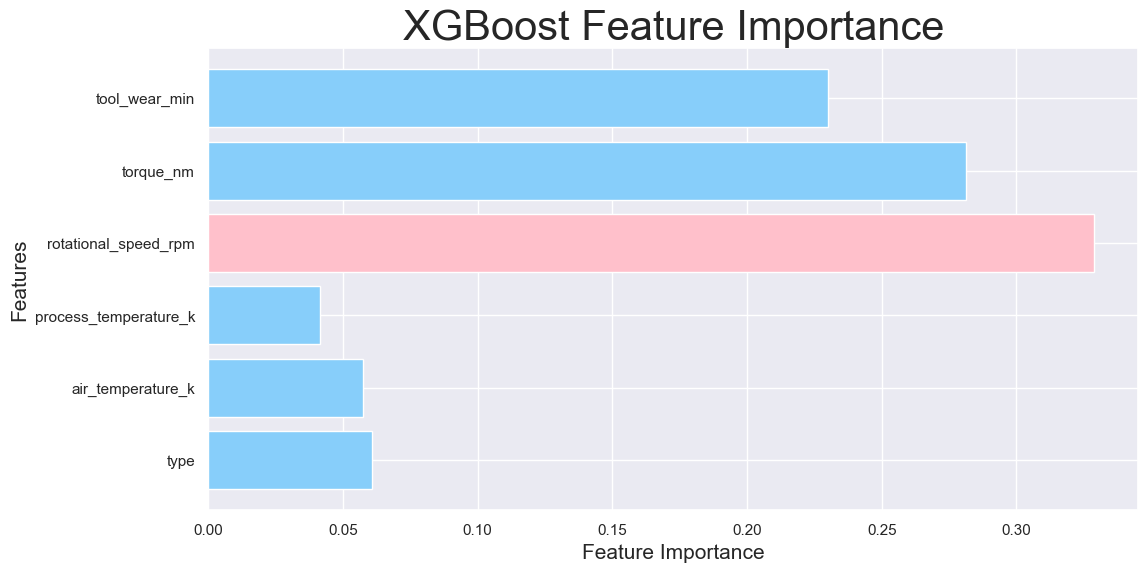

In [70]:
feature_importance = xgboost_model.feature_importances_
feature_names = X_train.columns

# 가장 큰 값의 인덱스를 찾기
max_importance_idx = feature_importance.argmax()

# 막대 그래프 색상 리스트를 생성
colors = ['pink' if i == max_importance_idx else '#87CEFA' for i in range(len(feature_names))]

plt.figure(figsize=(12, 6))
plt.barh(feature_names, feature_importance, color=colors)
plt.xlabel('Feature Importance', fontsize=15)
plt.ylabel('Features', fontsize=15)
plt.title('XGBoost Feature Importance', fontsize=30)
plt.grid(True)
plt.show()


- **rotational speed rpm, torque, tool wear min 순서로 결과에 영향을 줌 (Fault에 영향)**
- 참고용. 유의미한 feature이 뽑힌 것인지 검토하여 사용하는 것이 좋긴 하다

### 모델 2. XGBoost로 고장 여부 판단 및 고장 원인 분류 테스트 with Over sampling (SMOTE)

In [60]:
X3 = df2.drop(columns = ['target', 'failure_type'])
y3 = df2['failure_type']

smote = SMOTE(random_state=42)
X_resampled2, y_resampled2 = smote.fit_resample(X3, y3)

X_train, X_valid, y_train, y_valid = train_test_split(X_resampled2, y_resampled2, test_size=0.2, random_state=42)

xgboost_model = xgb.XGBClassifier()
xgboost_model.fit(X_train, y_train)

y_pred_xgboost = xgboost_model.predict(X_valid)
score_xgboost = xgboost_model.score(X_valid, y_valid)
print('score: ', score_xgboost)

report = classification_report(y_true=y_valid, y_pred=y_pred_xgboost)
print('\n', report)

score:  0.9951607328033184

               precision    recall  f1-score   support

           0       1.00      0.98      0.99      1962
           1       1.00      1.00      1.00      1884
           2       1.00      1.00      1.00      1845
           3       1.00      1.00      1.00      1965
           4       0.98      1.00      0.99      1921
           5       1.00      1.00      1.00      1995

    accuracy                           1.00     11572
   macro avg       1.00      1.00      1.00     11572
weighted avg       1.00      1.00      1.00     11572



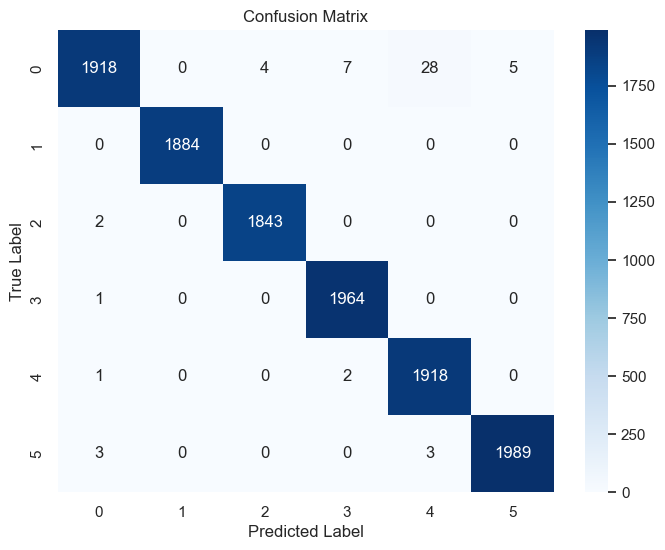

In [62]:
cm = confusion_matrix(y_valid, y_pred_xgboost)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()